# 项目：调查数据集（TMDb电影数据 ）

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介


In [44]:
# 用这个框对你计划使用的所有数据包设置
#   导入语句。
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## 数据整理

### 常规属性

In [27]:
# 加载数据并打印几行。进行几项操作，检查数据
#   类型，以及是否有缺失数据或错误数据。
df_movies = pd.read_csv('tmdb_movies.csv')

In [28]:
# 加载前几行数据，初步了解信息
df_movies.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [29]:
# 检查数据行，列数
df_movies.shape

(10866, 21)

In [30]:
# 检查数据类型
df_movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [31]:
# 检查是否有遗失数据
df_movies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**数据中部分内容有缺失，做具体分析时需要做丢空处理。**

In [32]:
# 检查是否有重复数据
df_movies.duplicated().value_counts()

False    10865
True         1
dtype: int64

**数据中有一行是重复数据。**

### 数据清理（去除重复数据）

In [33]:
# 讨论数据结构和需要解决的任何问题之后，
#   在本段的第二部分进行这些清理步骤。
df_movies.drop_duplicates(inplace=True)
df_movies.shape

(10865, 21)

<a id='eda'></a>
## 探索性数据分析

### 研究问题 1（对比各种电影类型对总票房情况？）


In [34]:
# 检查 genres 列是否有空值
df_movies['genres'].isnull().sum()

23

In [35]:
# 对 genres 列空值做丢弃处理
df_movies.dropna(subset=['genres'],inplace=True)

In [36]:
# 创建函数 create 对 dataframe 中某列做拆分
def create(origin_df,col_name,split_key):
    s = origin_df[col_name].str.split(split_key, expand=True).stack()
    i = s.index.get_level_values(0)
    df2 = origin_df.loc[i].copy()
    df2[col_name] = s.values
    return df2

In [37]:
# 验证函数 create 是否可以完成相应任务
df_genres = create(df_movies,'genres','|')
df_genres.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


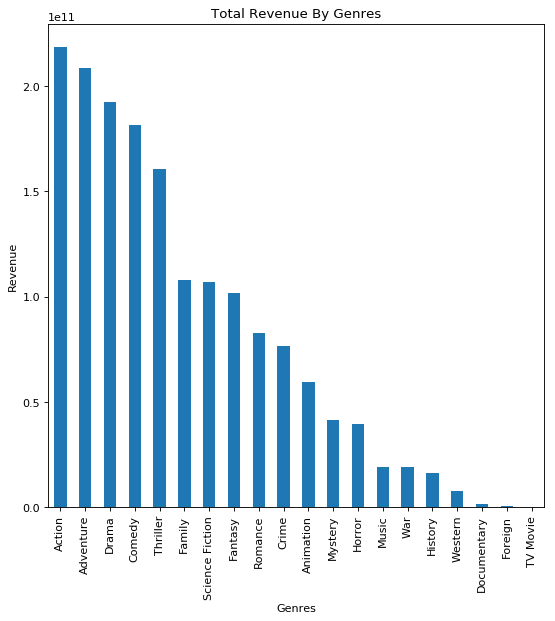

In [38]:
# 统计各个电影类别总票房，并制图
plt.figure(figsize=(8, 8), dpi=80)
df_genres.groupby('genres')['revenue_adj'].agg(sum).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Genres')
plt.ylabel('Revenue')
plt.title('Total Revenue By Genres');

图表说明：上图是针对不同电影类型的票房做汇总统计，首先对每一条记录的类型做了拆分，然后对每一类型做了票房汇总，最后以柱状图形式做呈现。<br>
由上图可得，Action、Adventure、Drama 分别是总票房最高的三种电影类型，Documentary、Foreign、TV Movie 是总票房最低的三种电影类型。

### 研究问题 2（根据数据统计，是否电影的预算越高意味着电影的票房也会越高？）

r-squared:0.42
p_value:0.000000e+00
Revenue=2.73*Budget+3535048.23


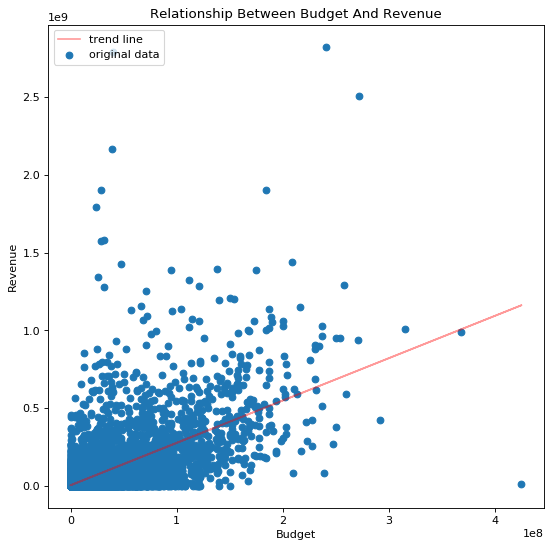

In [39]:
# 继续探索数据，解决你的附加研究问题。
#   如果有其它问题要调查，
#   请根据需要添加更多标题。
from scipy import stats

q2_x = df_movies['budget_adj']
q2_y = df_movies['revenue_adj']

plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(q2_x, q2_y,label='original data')
slope, intercept, r_value,p_value= stats.linregress(q2_x, q2_y)[:4]
plt.plot(q2_x,intercept+slope*q2_x,"r",alpha=0.4,label='trend line')

plt.legend(loc=2)
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Relationship Between Budget And Revenue');

print("r-squared:%.2f"%(r_value**2))
print("p_value:%e"%(p_value))
print("Revenue=%.2f*Budget+%.2f"%(slope,intercept))

图表说明：上图是对 Budget 和 Revenue 做相关性分析，对此两个变量做线性回归。<br>
由上图可得，电影预算和票房成正相关，两者之间 R 平方值为 0.42 ，其线性回归方程为 Revenue=2.73*Budget+3525597.76

### 研究问题 3（根据数据统计，电影市场的总票房随时间年份如何变化？）

In [40]:
# 探索 release_year 列
df_movies.sort_values('release_year')['release_year'].describe()

count    10842.000000
mean      2001.314794
std         12.813617
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

数据中 release_year 从1960年记录到2015年，下面对各个年份做汇总统计

In [41]:
s_year_revenue = df_movies.groupby('release_year')['revenue_adj'].sum()

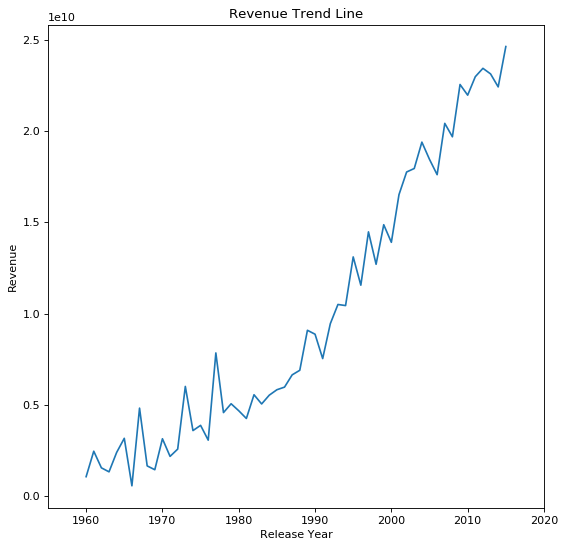

In [42]:
plt.figure(figsize=(8, 8), dpi=80)
s_year_revenue.plot.line()
plt.xlim(1955,2020)
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.title('Revenue Trend Line');

图表说明：上图是对从1960年到2015年之间，记录中电影总票房的变化趋势。<br>
由上图可得，自1960年至2015年，电影市场的总票房呈上升趋势，并于2015年达到总票房的影类型。

<a id='conclusions'></a>
## 结论

> **说明**：本文所得结论仅根据 TMDb 中1960年到2015年的数据，结论具有暂时性。


### 研究问题 1 结论（对比各种电影类型对总票房情况？）
如图所示为各种电影类型的对比图，其中Action、Adventure、Drama 分别是总票房最高的三种电影类型。
<br>限制说明：统计样本为1960年到2015年之间的10866部电影，大多数电影都包含了多个电影类型，分析过程中对电影的多个类型做了拆分，分析电影类型对总票房的影响，需要综合电影的多个类型。

### 研究问题 2 结论（根据数据统计，是否电影的预算越高意味着电影的票房也会越高？）
如图所示，电影预算和票房成正相关，两者之间 R 平方值为 0.42 ，其线性回归方程为 Revenue=2.73*Budget+3525597.76
<br>限制说明：统计样本为1960年到2015年之间的10866部电影，电影预算和票房的相关系数 R 平方值为 0.42 属于中等相关变量。

### 研究问题 3 结论（根据数据统计，电影市场的总票房随时间年份如何变化？）
如图所示，自1960年至2015年，电影市场的总票房呈上升趋势，并于2015年达到总票房的最高点。
<br>限制说明：统计样本为1960年到2015年之间的10866部电影。

In [45]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

255